# Proyek Analisis Data: E-commerce (Public Dataset)
- **Nama:** Rinda Ristanti
- **Email:** ristantirinda10@gmail.com
- **ID Dicoding:** rinda_ristanti

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan ecommerce dalam beberapa bulan terakhir ?
- Bagaimana performa revenue ecommerce dalam beberapa bulan terakhir ?
- Produk apa yang paling banyak dan paling sedikit terjual ?
- Bagaimana demografi pelanggan berdasarkan state ?
- Bagaimana demografi pelanggan berdasarkan city ?
- Kapan terakhir pelanggan melakukan transaksi ?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir ?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir ?
- Bagaimana segmentasi pelanggann berdasarkan RFM ?

## Import Semua Packages/Library yang Digunakan

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [219]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [220]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [221]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [222]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [223]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [224]:
product_category_df = pd.read_csv('product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [225]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [226]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
Data yang akan digunakan dalam analisis yaitu data
- customers
- order_items
- order_payments
- orders
- product_category
- products
- sellers

### Assessing Data

In [227]:
print('\n', customers_df.info())
print('\nJumlah duplikasi:\n', customers_df.duplicated().sum())
print('\nJumlah missing value:\n', customers_df.isna().sum())
print('\nData describe:\n', customers_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None

Jumlah duplikasi:
 0

Jumlah missing value:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data describe:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096 

**Insight:**
- Tidak ada masalah dengan tipe data dari seluruh kolom
- Tidak ada duplikasi data
- Tidak ada missing value
- Describe data menunjukkan tidak ada inaccurate value

In [228]:
print('\n', order_items_df.info())
print('\nJumlah duplikasi:\n', order_items_df.duplicated().sum())
print('\nJumlah missing value:\n', order_items_df.isna().sum())
print('\nData describe:\n', order_items_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

 None

Jumlah duplikasi:
 0

Jumlah missing value:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data describe:
                                 order_id  order_item_id  \
count                             112650  112650.000

Insight:

- Terdapat kesalahan tipe data untuk kolom shipping limit date
- Tidak ada duplikasi data
- Tidak ada missing value
- Describe data menunjukkan tidak ada inaccurate value

In [229]:
print('\n', order_payments_df.info())
print('\nJumlah duplikasi:\n', order_payments_df.duplicated().sum())
print('\nJumlah missing value:\n', order_payments_df.isna().sum())
print('\nData describe:\n', order_payments_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

 None

Jumlah duplikasi:
 0

Jumlah missing value:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data describe:
                                 order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e8

**Insight:**

- Tidak ada masalah dengan tipe data dari seluruh kolom
- Tidak ada duplikasi data
- Tidak ada missing value
- Describe data menunjukkan tidak ada inaccurate value

In [230]:
print('\n', order_reviews_df.info())
print('\nJumlah duplikasi:\n', order_reviews_df.duplicated().sum())
print('\nJumlah missing value:\n', order_reviews_df.isna().sum())
print('\nData describe:\n', order_reviews_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

 None

Jumlah duplikasi:
 0

Jumlah missing value:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Data describe:
                                review_id           

**Insight:**

- Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp
- Tidak ada duplikasi data
- Terdapat missing value
- Describe data menunjukkan tidak ada inaccurate value

In [231]:
print('\n', orders_df.info())
print('\nJumlah duplikasi:\n', orders_df.duplicated().sum())
print('\nJumlah missing value:\n', orders_df.isna().sum())
print('\nData describe:\n', orders_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None

Jumlah duplikasi:
 0

Jumlah missing value:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_car

**Insight:**

- Terdapat kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- Tidak ada duplikasi data
- Terdapat missing value
- Describe data menunjukkan tidak ada inaccurate value

In [232]:
print('\n', product_category_df.info())
print('\nJumlah duplikasi:\n', product_category_df.duplicated().sum())
print('\nJumlah missing value:\n', product_category_df.isna().sum())
print('\nData describe:\n', product_category_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

 None

Jumlah duplikasi:
 0

Jumlah missing value:
 product_category_name            0
product_category_name_english    0
dtype: int64

Data describe:
        product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


**Insight:**

- Tidak ada masalah dengan tipe data dari seluruh kolom
- Tidak ada duplikasi data
- Tidak ada missing value
- Describe data menunjukkan tidak ada inaccurate value

In [233]:
print('\n', products_df.info())
print('\nJumlah duplikasi:\n', products_df.duplicated().sum())
print('\nJumlah missing value:\n', products_df.isna().sum())
print('\nData describe:\n', products_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

 None

Jumlah duplikasi:
 0

Jumlah missing value:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty      

**Insight:**

- Tidak ada masalah dengan tipe data dari seluruh kolom
- Tidak ada duplikasi data
- Terdapat missing value
- Describe data menunjukkan tidak ada inaccurate value

In [234]:
print('\n', sellers_df.info())
print('\nJumlah duplikasi:\n', sellers_df.duplicated().sum())
print('\nJumlah missing value:\n', sellers_df.isna().sum())
print('\nData describe:\n', sellers_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

 None

Jumlah duplikasi:
 0

Jumlah missing value:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Data describe:
                                seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq            

**Insight:**

- Tidak ada masalah dengan tipe data dari seluruh kolom
- Tidak ada duplikasi data
- Tidak ada missing value
- Describe data menunjukkan tidak ada inaccurate value

### Cleaning Data

**Mengubah tipe data**

In [235]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

print('\n', order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB

 None


In [236]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

print('\n', order_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB

 None


In [237]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

print('\n', orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB

 None


**Mengatasi Missing Value**

In [238]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [239]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [240]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [241]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [242]:
order_reviews_df.fillna(value="No comment", inplace=True)

In [243]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [244]:
print('\nJumlah missing value:\n', orders_df.isna().sum())


Jumlah missing value:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [245]:
orders_df.dropna(axis=0, inplace=True)

In [246]:
print('\nJumlah missing value:\n', orders_df.isna().sum())


Jumlah missing value:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [247]:
print('\nJumlah missing value:\n', products_df.isna().sum())


Jumlah missing value:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [248]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [249]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [250]:
products_df.dropna(axis=0, inplace=True)

In [251]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [252]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
Cleaning data sudah berhasil dilakukan.
- Penyesuaian tipe data
- Penanganan missing value

In [253]:
customers_orders_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="outer",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP


## Exploratory Data Analysis (EDA)

Eksplorasi data customer_df

In [254]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [255]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [256]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
Berdasarkan hasil di atas, dapat dilihat bahwa pelanggan tersebar di beragam kota dan negara bagian. Pelanggan kita paling banyak berada di kota sao paulo. Selain itu, pelanggan kita paling banyak berasal dari negara bagian SP.

In [257]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [258]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [259]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [260]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.517007
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 23 hari dengan nilai maksimum sebesar 155 hari dan nilai minimum sebesar 2 hari.

In [261]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
48520,ec00ab0303dffd44357edc479d825f63,d2f79db37031301a54d560415cadac21,29160,serra,ES,Active
24708,e506618caa63a29ae2cc528536f0d11e,e77efb6522986a5e862a54dd91251bb3,26900,miguel pereira,RJ,Active
11454,6ff0fee93d2dc903b5a87946585e5d94,0561627154992057c23a3630478e6a44,29043,vitoria,ES,Active
71040,861840102ebde6fa719f7fd8cbfbd269,84878dd72193c6b08a3c5bfd8246ad0b,39404,montes claros,MG,Active
28952,4b92257e64f8b355f6bef19fe858a85b,0c77ec2968933d58ee81f2e59d8b0ee3,99300,soledade,RS,Active


In [262]:
status_counts = customers_df.groupby(by="status").customer_id.size()
status_counts

,customer_id
status,
Active,96461
Non Active,2980


In [263]:
status_percentages = (status_counts / status_counts.sum()) * 100

print(status_percentages)

status
Active        97.003248
Non Active     2.996752
Name: customer_id, dtype: float64


Seperti yang terlihat pada pivot table di atas, sebagian besar pelanggan merupakan customer aktif atau pernah melakukan transaksi sebelumnya. Ini tentunya merupakan kabar baik bagi kita karena sekitar 97% pelanggan kita sudah pernah melakukan order sebelumnya.

In [264]:
orders_and_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_and_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [265]:
orders_and_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


Berdasarkan hasil tersebut, diketahui bahwa kota Sao Paulo dan Rio de Janeiro merupakan dua kota yang memiliki jumlah order terbanyak

In [266]:
orders_and_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,40489
RJ,12351
MG,11352
RS,5342
PR,4923
SC,3547
BA,3256
DF,2080
ES,1995


Berdasarkan pivot table tersebut, diketahui bahwa SP merupakan state yang balik banyak melakukan order.

In [267]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Berdasarkan hasil tersebut, kita memperoleh informasi yang menarik yaitu pada setiap transaksi pelanggan paling banyak membeli 21 buah item dalam satu jenis produk dengan total harga sebesar 6735 dolar.

In [268]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Berdasarkan hasil tersebut, dapat dilihat bahwa payment yang dibayarkan customer berkisar antara 0 hingga 13664 dolar.

In [269]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [270]:
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [271]:
product_lists_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_lists_df.head(10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


In [272]:
# Drop columns that exist in the DataFrame
columns_to_drop = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", "product_photos_qty", "product_description_lenght", "product_name_lenght"]
# Only include columns that are actually in the DataFrame
existing_columns = [col for col in columns_to_drop if col in product_lists_df.columns]
product_lists_df.drop(columns=existing_columns, inplace=True)

product_lists_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [273]:
product_and_items_df = pd.merge(
    left=order_items_df,
    right=product_lists_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_and_items_df.head(10)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,housewares
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telefonia,telephony
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,ferramentas_jardim,garden_tools
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,health_beauty
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,livros_tecnicos,books_technical


In [274]:
product_and_items_df.sort_values(by="price", ascending=False).head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,small_appliances
62086,8dbc85d1447242f3b127dda390d56e19,1,259037a6a41845e455183f89c5035f18,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78,pcs,computers
29193,426a9742b533fc6fed17d1fd6d143d7e,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45,instrumentos_musicais,musical_instruments
45843,68101694e5c5dc7330c91e1bbc36214f,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27,consoles_games,consoles_games
78310,b239ca7cd485940b31882363b52e6674,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,2018-08-02 08:15:14,4059.00,104.51,esporte_lazer,sports_leisure
59137,86c4eab1571921a6a6e248ed312f5a5a,1,6902c1962dd19d540807d0ab8fade5c6,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-23 20:08:04,3999.90,17.01,relogios_presentes,watches_gifts


In [275]:
product_and_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111046,111022
unique,98666,NaN,32951,3095,NaN,NaN,NaN,73,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho,bed_bath_table
freq,21,NaN,527,2033,NaN,NaN,NaN,11115,11115
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN


In [276]:
product_and_items_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "order_item_id" : "sum",
    "price":  ["sum", "min", "max"]
})

order_id order_item_id       price         \
                               nunique           sum         sum    min   
product_category_name_english                                             
agro_industry_and_commerce         182           265    72530.47  12.99   
air_conditioning                   253           362    55024.96  10.90   
art                                202           230    24202.64   3.50   
arts_and_craftmanship               23            26     1814.01   9.80   
audio                              350           383    50688.50  14.90   
...                                ...           ...         ...    ...   
stationery                        2311          2805   230943.23   2.29   
tablets_printing_image              79            89     7528.41  14.90   
telephony                         4199          5161   323667.53   5.00   
toys                              3886          4445   483946.60   4.90   
watches_gifts                     5624          6594  1205005.68   8.99   

                                        
                                   max  
product_category_name_english           
agro_industry_and_commerce     2990.00  
air_conditioning               1599.00  
art                            6499.00  
arts_and_craftmanship           289.49  
audio                           598.99  
...                                ...  
stationery                     1693.00  
tablets_printing_image          889.99  
telephony                      2428.00  
toys                           1699.99  
watches_gifts                  3999.90  

[71 rows x 5 columns]

In [277]:
(
    product_and_items_df
    .groupby(by="product_category_name_english")
    .agg({
        "order_id": "nunique",
        "order_item_id" : "sum",
        "price":  ["sum", "min", "max"]
    })
    .sort_values(by=("price", "sum"), ascending=False)
)

order_id order_item_id       price          \
                               nunique           sum         sum     min   
product_category_name_english                                              
health_beauty                     8836         11081  1258681.34    1.20   
watches_gifts                     5624          6594  1205005.68    8.99   
bed_bath_table                    9417         13665  1036988.68    6.99   
sports_leisure                    7720          9932   988048.97    4.50   
computers_accessories             6689          9874   911954.32    3.90   
...                                ...           ...         ...     ...   
flowers                             29            37     1110.04   15.60   
home_comfort_2                      24            39      760.27   12.90   
cds_dvds_musicals                   12            16      730.00   45.00   
fashion_childrens_clothes            8             8      569.85   39.99   
security_and_services                2             2      283.29  100.00   

                                        
                                   max  
product_category_name_english           
health_beauty                  3124.00  
watches_gifts                  3999.90  
bed_bath_table                 1999.98  
sports_leisure                 4059.00  
computers_accessories          3699.99  
...                                ...  
flowers                          65.90  
home_comfort_2                  219.99  
cds_dvds_musicals                65.00  
fashion_childrens_clothes       110.00  
security_and_services           183.29  

[71 rows x 5 columns]

Berdasarkan pivot table tersebut, diketahui bahwa produk health beauty merupakan produk yang paling banyak menyumbang revenue terhadap perusahaan.  

In [278]:
(
    product_and_items_df
    .groupby(by="product_category_name_english")
    .agg({
        "order_id": "nunique",
        "order_item_id" : "sum",
        "price":  ["sum", "min", "max"]
    })
    .sort_values(by=("order_item_id", "sum"), ascending=False)
)

order_id order_item_id       price          \
                               nunique           sum         sum     min   
product_category_name_english                                              
bed_bath_table                    9417         13665  1036988.68    6.99   
furniture_decor                   6449         11540   729762.49    4.90   
health_beauty                     8836         11081  1258681.34    1.20   
sports_leisure                    7720          9932   988048.97    4.50   
computers_accessories             6689          9874   911954.32    3.90   
...                                ...           ...         ...     ...   
arts_and_craftmanship               23            26     1814.01    9.80   
cds_dvds_musicals                   12            16      730.00   45.00   
la_cuisine                          13            16     2054.99   24.00   
fashion_childrens_clothes            8             8      569.85   39.99   
security_and_services                2             2      283.29  100.00   

                                        
                                   max  
product_category_name_english           
bed_bath_table                 1999.98  
furniture_decor                1899.00  
health_beauty                  3124.00  
sports_leisure                 4059.00  
computers_accessories          3699.99  
...                                ...  
arts_and_craftmanship           289.49  
cds_dvds_musicals                65.00  
la_cuisine                      389.00  
fashion_childrens_clothes       110.00  
security_and_services           183.29  

[71 rows x 5 columns]

Berdasarkan pivot table tersebut, diketahui bahwa produk bed bath table merupakan produk yang paling banyak terjual.  

In [279]:
all_df = pd.merge(
    left=product_and_items_df,
    right=orders_and_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,customer_id,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,3ce436f183e68e07877b285a838db11a,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,Active
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,Active
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,d4eb9395c8c0431ee92fce09860c5a06,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,Active
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,Active


In [280]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id    price
customer_state product_category_name_english                        
AC             auto                                       4   540.98
               baby                                       3   697.84
               bed_bath_table                             6   567.70
               books_general_interest                     2   633.80
               christmas_supplies                         1    69.90
...                                                     ...      ...
TO             sports_leisure                            27  5144.32
               stationery                                 3   276.80
               telephony                                 22  1268.12
               toys                                      14  1864.15
               watches_gifts                             33  4920.89

[1351 rows x 2 columns]

In [281]:
all_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id   price
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest                     1   39.90
                    cool_stuff                                 1  199.00
                    sports_leisure                             1  120.00
abadiania           small_appliances                           1  949.99
abaete              baby                                       1   65.00
...                                                          ...     ...
ze doca             food_drink                                 1   65.00
                    garden_tools                               1   39.90
                    musical_instruments                        1  359.00
                    sports_leisure                             1  149.90
zortea              computers_accessories                      1   69.90

[24891 rows x 2 columns]

## Visualization & Explanatory Analysis

In [282]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111046 non-null  object        
 8   product_category_name_english  111022 non-null  object        
 9   customer_id                    110180 non-null  object        
 10  order_status                   110180 non-null  object        
 11  

In [283]:
all_df.to_csv('all_data.csv', index=False)

In [284]:
all_df.rename(columns={
    "order_purchase_timestamp": "order_date",
}, inplace=True)

### Pertanyaan 1: Bagaimana performa penjualan ecommerce dalam beberapa bulan terakhir ?

In [285]:
monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

In [286]:
monthly_orders_df

,order_date,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,40941.30
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,111712.47
5,2017-02,1641,232638.86
6,2017-03,2546,359198.85
7,2017-04,2303,340669.68
8,2017-05,3545,489159.25
9,2017-06,3135,421923.37


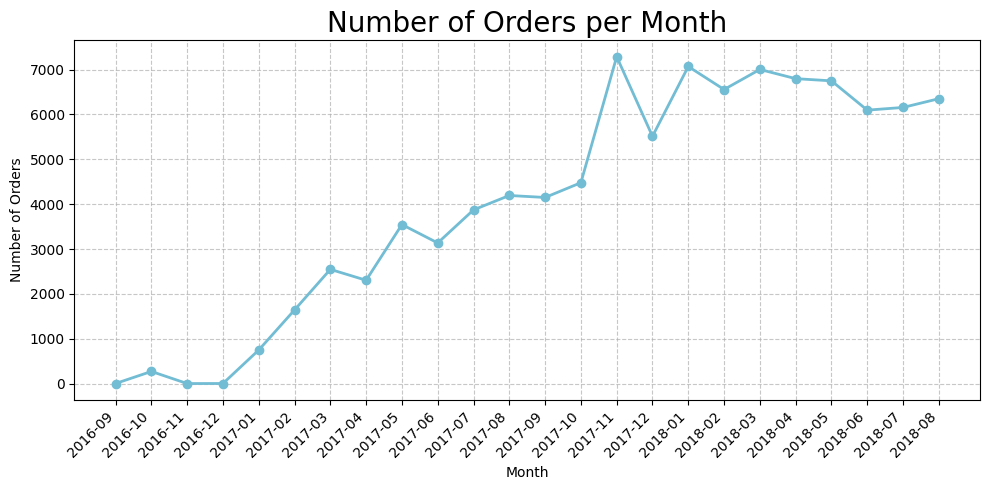

In [287]:
monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan November 2017. Selain itu, kita juga dapat melihat jumlah order yang cenderung mengalami peningkatan setiap tahun namun pada tahun 2018 mengalami sedikit penurunan.

### Pertanyaan 2: Bagaimana performa revenue ecommerce dalam beberapa bulan terakhir ?

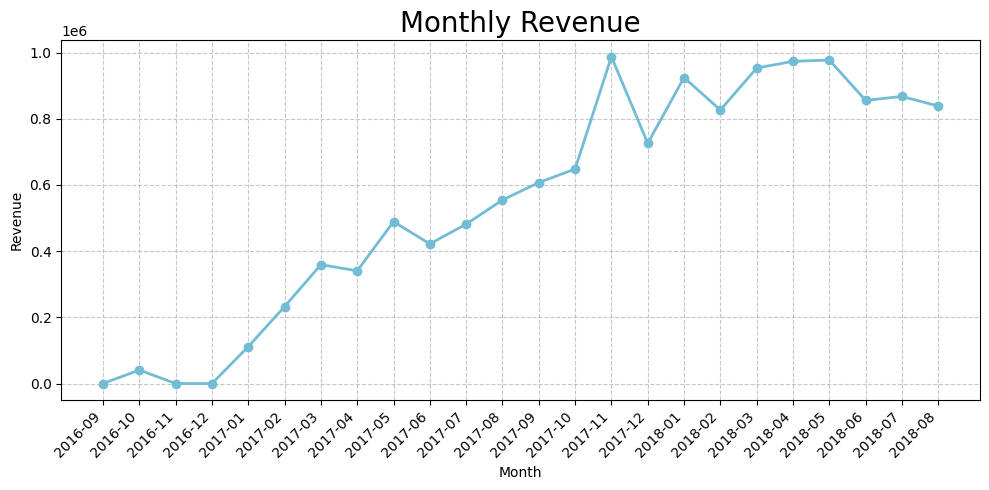

In [288]:
monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Monthly Revenue", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa revenue terbanyak terjadi pada bulan November 2017. Penurunan jumlah orderan yang terjadi di awal tahun 2018 berdampak terhadap penurunan revenue perusahaan.

### Pertanyaan 3: Produk apa yang paling banyak dan paling sedikit terjual ?

In [289]:
sum_order_items_df = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name_english,order_item_id
0,bed_bath_table,13665
1,furniture_decor,11540
2,health_beauty,11081
3,sports_leisure,9932
4,computers_accessories,9874
5,housewares,9051
6,watches_gifts,6594
7,garden_tools,5874
8,telephony,5161
9,auto,4881


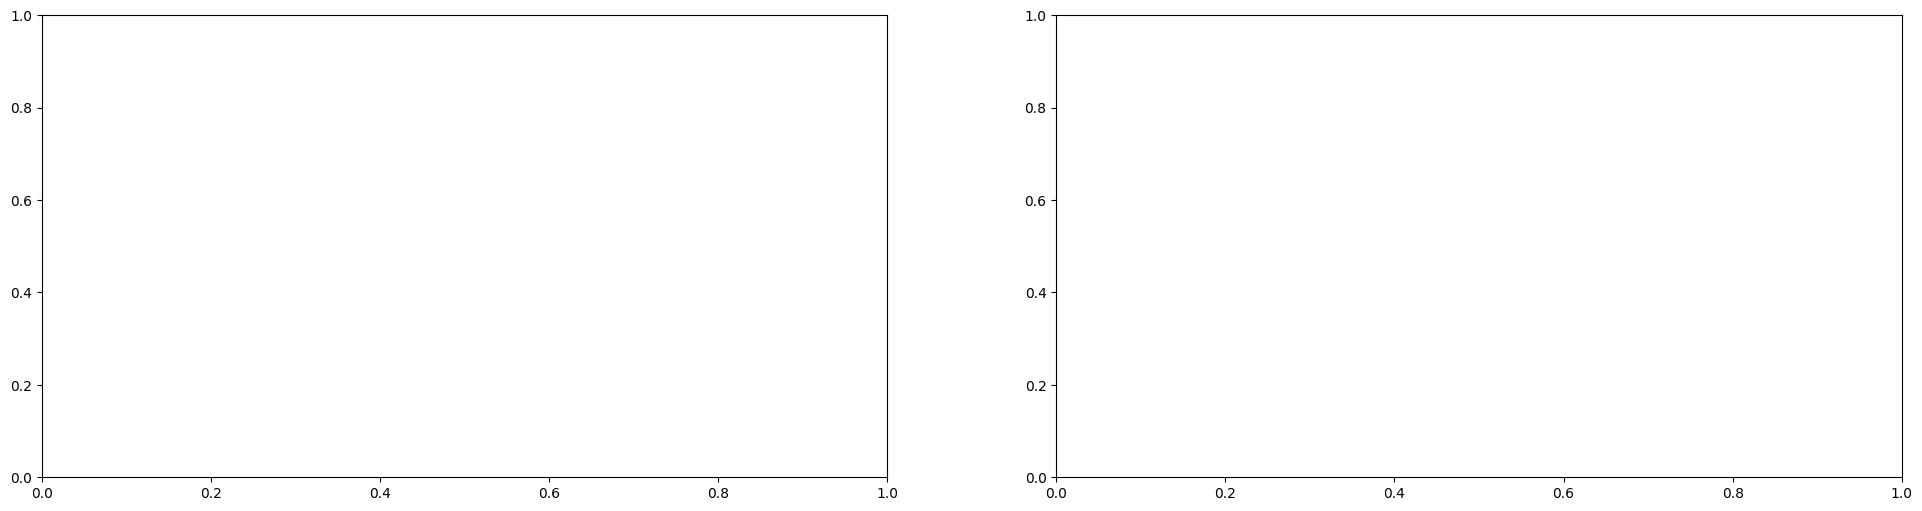

In [290]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

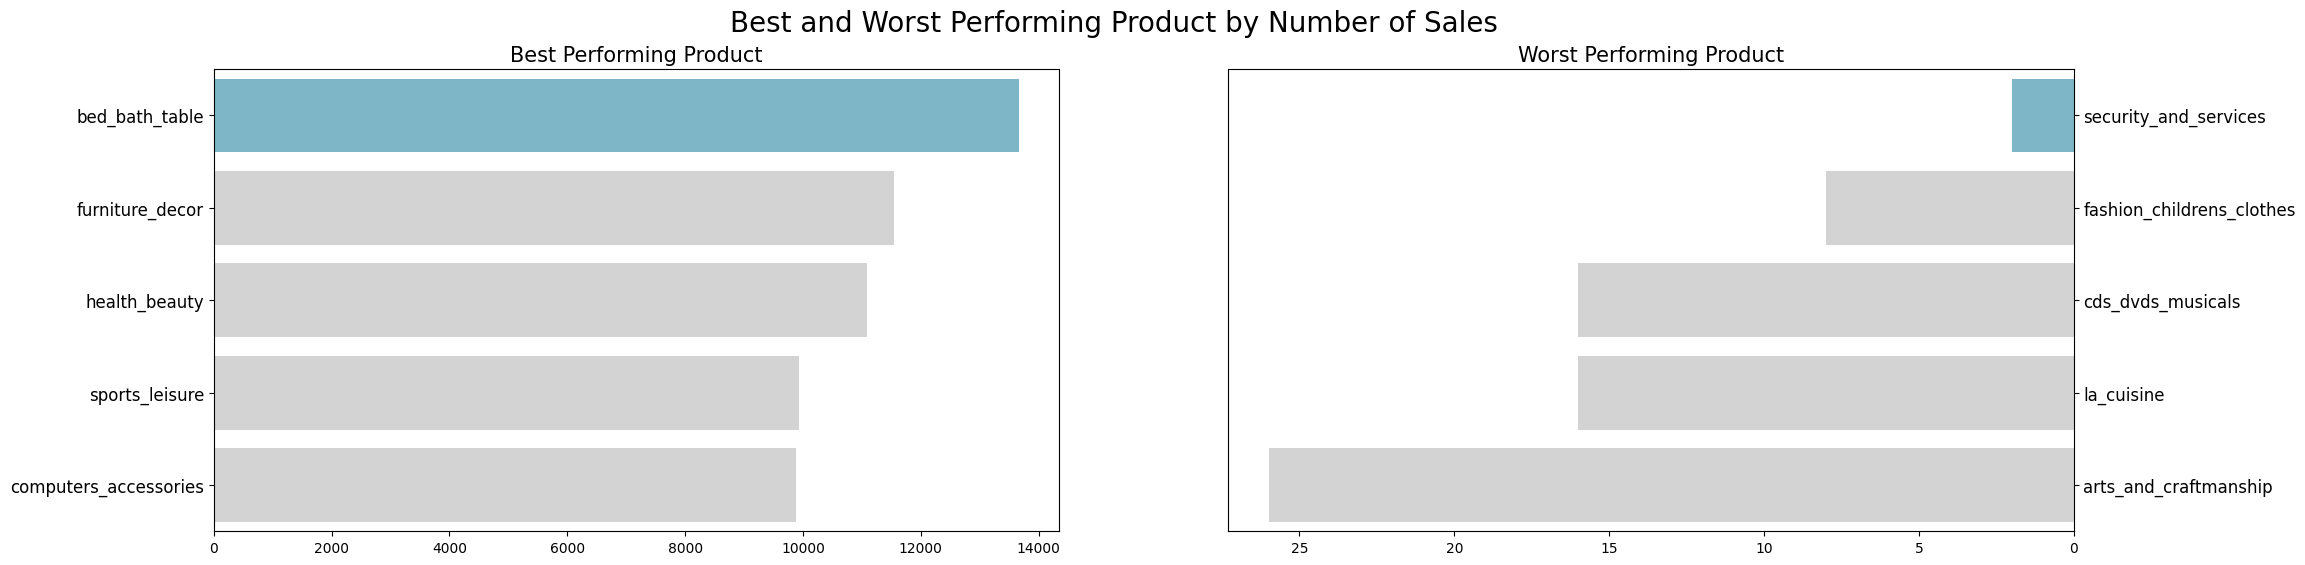

In [291]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Best Performing Product
sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), hue="product_category_name_english", palette=colors, dodge=False, ax=ax[0]) # Added hue and dodge=False
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend([],[], frameon=False)  # Remove the legend

# Worst Performing Product
sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), hue="product_category_name_english", palette=colors, dodge=False, ax=ax[1]) # Added hue and dodge=False
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend([],[], frameon=False)  # Remove the legend

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

Berdasarkan gambar di atas, Anda dapat melihat bahwa produk bed bath table merupakan produk yang paling laris. Kontras dengan hal tersebut, produk security and services merupakan produk yang paling sedikit terjual.

### Pertanyaan 4: Bagaimana demografi pelanggan berdasarkan state ?

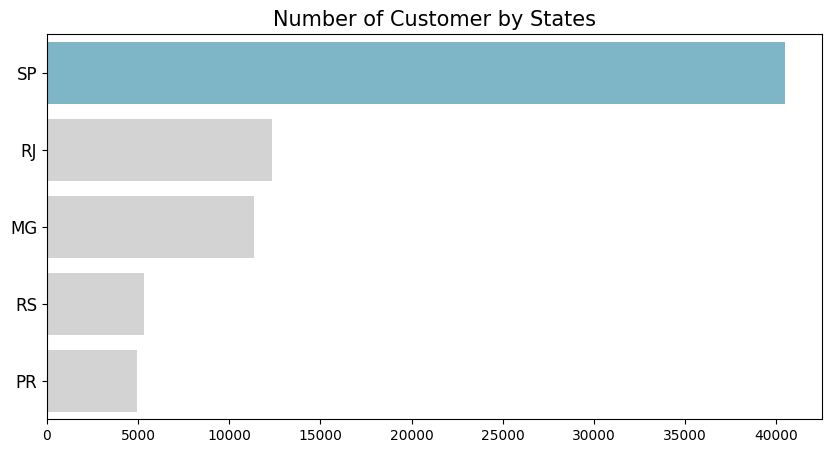

In [292]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Corrected barplot call:
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(5),
    palette=colors_,
    hue="customer_state",  # Assign 'customer_state' to 'hue'
    dodge=False,          # Prevent bar separation
    legend=False          # Hide the legend
)

plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari negara bagian Sao Paulo (SP).

### Pertanyaan 5: Bagaimana demografi pelanggan berdasarkan city ?

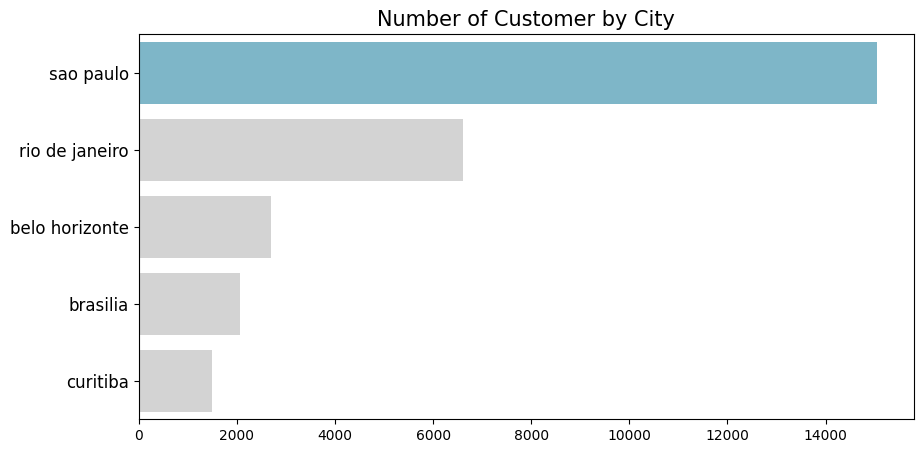

In [293]:
bystate_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(5),
    palette=colors_,
    hue="customer_city",  # Assign 'customer_city' to 'hue'
    dodge=False,          # Prevent bar separation
    legend=False          # Hide the legend
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari kota Sao Paulo (SP).

## RFM ANALYSIS

In [294]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111046 non-null  object        
 8   product_category_name_english  111022 non-null  object        
 9   customer_id                    110180 non-null  object        
 10  order_status                   110180 non-null  object        
 11  

In [295]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   delivery_time                  96461 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 7.4+ MB


In [296]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


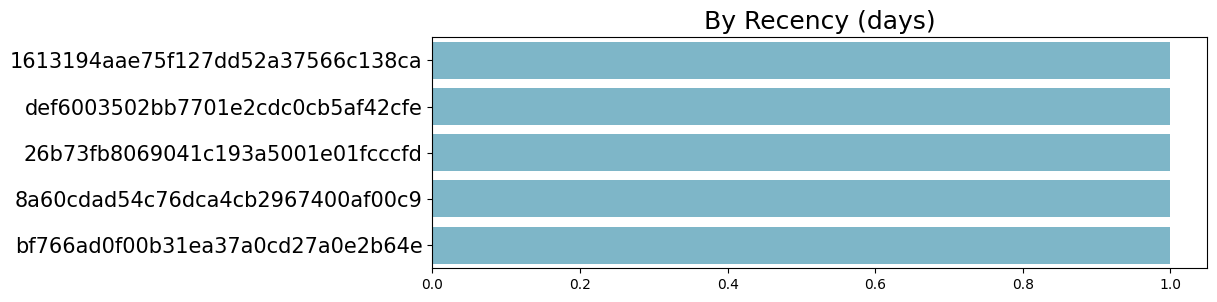

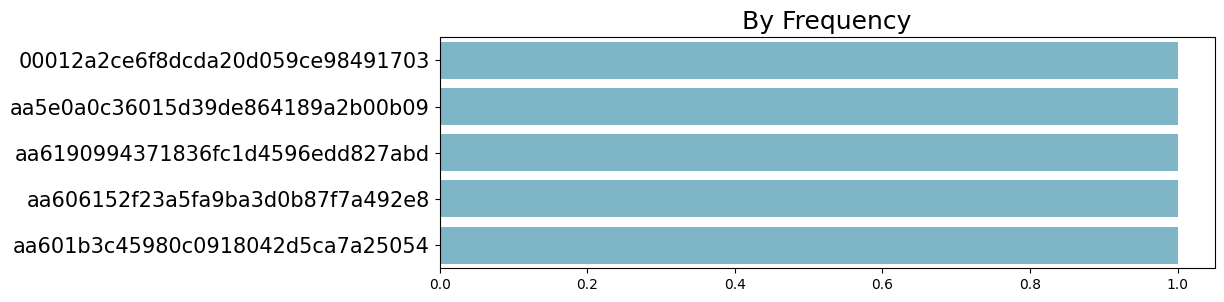

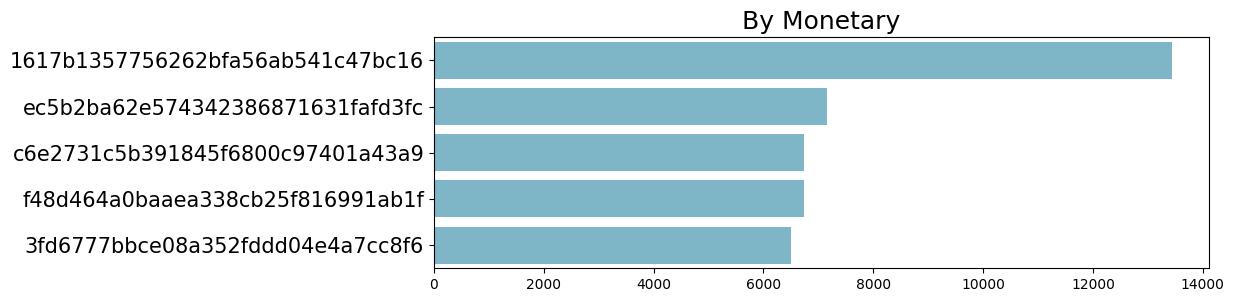

In [297]:
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# --- Recency Plot ---
recency_df = rfm_df[rfm_df['recency'] > 0].sort_values(by="recency", ascending=True).head(5)
plt.figure(figsize=(10, 3))
sns.barplot(x="recency", y="customer_id", data=recency_df, hue="customer_id", palette=colors, dodge=False, legend=False) # Assign 'hue' and set 'legend=False'
plt.ylabel(None)
plt.xlabel(None)
plt.title("By Recency (days)", loc="center", fontsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.show()

# --- Frequency Plot ---
plt.figure(figsize=(10, 3))
sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="customer_id", palette=colors, dodge=False, legend=False) # Assign 'hue' and set 'legend=False'
plt.ylabel(None)
plt.xlabel(None)
plt.title("By Frequency", loc="center", fontsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.show()

# --- Monetary Plot ---
plt.figure(figsize=(10, 3))
sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="customer_id", palette=colors, dodge=False, legend=False)  # Assign 'hue' and set 'legend=False'
plt.ylabel(None)
plt.xlabel(None)
plt.title("By Monetary", loc="center", fontsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.show()

- Grafik "By Recency (days)" menampilkan 5 pelanggan yang paling baru berbelanja. Meskipun batangnya hampir sama panjang dan mendekati 1 (kemungkinan karena data diskalakan), urutannya tetap penting: pelanggan terbawah paling baru berbelanja, sedangkan pelanggan teratas paling lama di antara kelimanya, menandakan mereka semua tergolong aktif.
- Semua batang dalam grafik "By Frequency" terlihat hampir sama panjangnya, mendekati nilai 1. Ini mengindikasikan bahwa 5 pelanggan teratas ini memiliki frekuensi pembelian yang sangat mirip dan sangat tinggi (mendekati nilai maksimum dalam dataset, yang kemungkinan telah dinormalisasi menjadi 1). Dengan kata lain, mereka adalah pelanggan yang sangat sering berbelanja.
- Grafik "By Monetary" menunjukkan variasi yang lebih besar dibandingkan dengan grafik "By Frequency". Pelanggan dengan ID 1617b1357756262bfa56ab541c47bc16 memiliki nilai moneter tertinggi, jauh melebihi pelanggan lainnya.

### Mengurutkan customer berdasarkan recency, frequency, dan monetary score

In [298]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,32945.5,48231.0,49426.0
1,000161a058600d5901f007fab4c27140,1,54.90,409,16036.0,48231.0,30662.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2635.0,48231.0,78483.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20206.5,48231.0,72196.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,64649.5,48231.0,51816.5


In [299]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,34.155988,100.0,51.239361
1,000161a058600d5901f007fab4c27140,1,54.90,409,16.625197,100.0,31.786940
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2.731816,100.0,81.362416
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20.948930,100.0,74.844756
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,67.024861,100.0,53.717565


In [300]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.12
1,000161a058600d5901f007fab4c27140,2.43
2,0001fd6190edaaf884bcaf3d49edf079,3.74
3,0002414f95344307404f0ace7a26f1d5,3.69
4,000379cdec625522490c315e70c7a9fb,3.43
5,0004164d20a9e969af783496f3408652,2.51
6,000419c5494106c306a97b5635748086,2.32


### Segmentasi customer berdasarkan RFM score

In [301]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'Lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.12,Medium value customer
1,000161a058600d5901f007fab4c27140,2.43,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.74,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.69,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.43,Medium value customer
5,0004164d20a9e969af783496f3408652,2.51,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.62,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.81,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [302]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15659
1,Lost customers,1086
2,Low value customers,40554
3,Medium value customer,33736
4,Top customers,5426


In [303]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "Lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

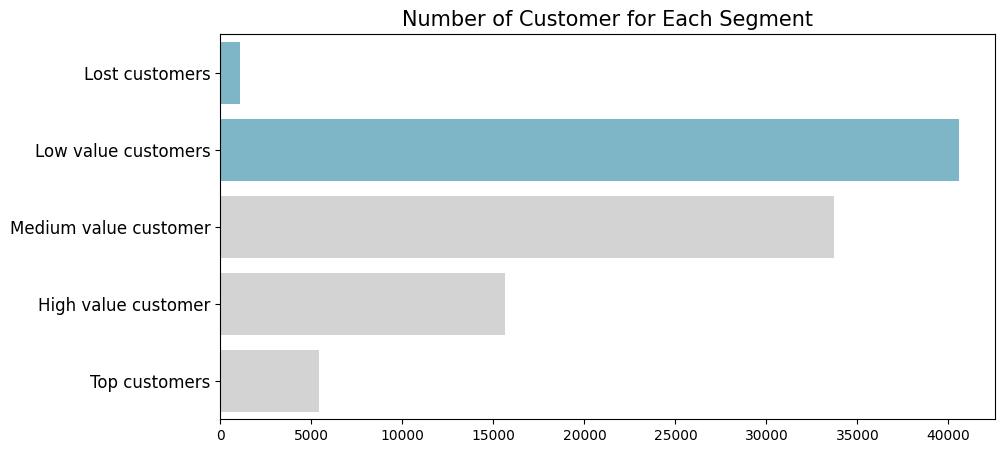

In [304]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_,
    hue="customer_segment",  # Assign 'customer_segment' to 'hue'
    dodge=False,          # Prevent bar separation
    legend=False          # Hide the legend
)

plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Sebagian besar pelanggan berada di segmen "Low value customers," yang mengindikasikan peluang untuk meningkatkan nilai pelanggan melalui strategi pemasaran yang tepat, misalnya program loyalitas atau penawaran khusus untuk mendorong pembelian berulang atau meningkatkan nilai transaksi. Meskipun jumlah "Top customers" sedikit, mereka merupakan aset penting bagi bisnis dan perlu dipertahankan dengan baik.

## Conclusion

- Performa penjualan cenderung meningkat setiap bulannya. Penjualan tertinggi terjadi pada bulan November 2017 yaitu ada sekitar 7000 order. Namun pada awal 2018 penjualan mulai mengalami sedikit demi sedikit penurunan performa.
- Performa revenue cenderung meningkat setiap bulannya, berbanding lurus dengan performa jumlah penjualan. Revenue tertinggi terjadi pada bulan November 2017. Namun pada awal 2018 revenue mulai mengalami sedikit demi sedikit penurunan performa sejalan dengan penurunan jumlah penjualan.
- Produk bed bath table merupakan produk yang paling laris. Kontras dengan hal tersebut, produk security and services merupakan produk yang paling sedikit terjual.
- Berdasarkan demografi, pelanggan terbanyak berasal dari kota Sau Paulo di negara bagian Sao Paulo.
- Berdasarkan RFM Analysis kelima pelanggan teratas ini tergolong sangat aktif dan loyal: mereka semua baru-baru ini berbelanja (Recency tinggi) dan frekuensi belanjanya juga sangat tinggi (Frequency mendekati maksimum). Namun, kontribusi nilai belanjanya (Monetary) bervariasi, dengan pelanggan 1617b1357756262bfa56ab541c47bc16 memberikan kontribusi terbesar secara signifikan.
- Sebagian besar pelanggan berada di segmen "Low value customers," yang mengindikasikan peluang untuk meningkatkan nilai pelanggan melalui strategi pemasaran yang tepat.